# Tyche Example for LDES

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

### Import packages.

In [5]:
import os
import sys
sys.path.insert(0, os.path.abspath("../../../src"))

In [6]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import re                as re
import scipy.stats       as st
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/framework/src/tyche/>.
import tyche             as ty

from copy import deepcopy

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [7]:
designs = ty.Designs(path = ".",
                     name = 'ldes.xlsx')

In [8]:
investments = ty.Investments(path = ".",
                             name = 'ldes.xlsx')

### Compile the production and metric functions for each technology in the dataset.

In [9]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [10]:
designs.functions

,Style,Model,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
LDES,numpy,ldes,capital_cost,fixed_cost,production,metrics,NaN


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [11]:
designs.indices

Offset               Description Notes
Technology Type    Index                                                 
LDES       Capital BoS 1                2                       NaN   NaN
                   BoS 2                5                       NaN   NaN
                   BoS 3                8                       NaN   NaN
                   Cavern               4                       NaN   NaN
                   Compress             3                       NaN   NaN
                   Electrolysis         1                       NaN   NaN
                   Fuel Cell            6                       NaN   NaN
                   Inverter             7                       NaN   NaN
                   Rectifier            0                       NaN   NaN
           Input   AC Electricity       0                       NaN   NaN
           Metric  GHG                  2  Greenhouse gas emissions   NaN
                   Jobs                 1                      Jobs   NaN
                   LCOS                 0                      Cost   NaN
           Output  AC Electricity       0                       NaN   NaN

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [12]:
designs.designs

Value  \
Technology Scenario      Variable          Index                    
LDES       Base          Input             AC Electricity  100000   
                         Input efficiency  AC Electricity       1   
                         Input price       AC Electricity    0.15   
                         Lifetime          BoS 1                1   
                                           BoS 2                1   
                                           BoS 3                1   
                                           Cavern               1   
                                           Compress             1   
                                           Electrolysis         1   
                                           Fuel Cell            1   
                                           Inverter             1   
                                           Rectifier            1   
                         Output efficiency AC Electricity       1   
                         Output price      AC Electricity    0.16   
                         Scale             system               1   
           High R&D LDES Input             AC Electricity  100000   
                         Input efficiency  AC Electricity       1   
                         Input price       AC Electricity    0.15   
                         Lifetime          BoS 1                1   
                                           BoS 2                1   
                                           BoS 3                1   
                                           Cavern               1   
                                           Compress             1   
                                           Electrolysis         1   
                                           Fuel Cell            1   
                                           Inverter             1   
                                           Rectifier            1   
                         Output efficiency AC Electricity       1   
                         Output price      AC Electricity    0.16   
                         Scale             system               1   
           Slow R&D LDES Input             AC Electricity  100000   
                         Input efficiency  AC Electricity       1   
                         Input price       AC Electricity    0.15   
                         Lifetime          BoS 1                1   
                                           BoS 2                1   
                                           BoS 3                1   
                                           Cavern               1   
                                           Compress             1   
                                           Electrolysis         1   
                                           Fuel Cell            1   
                                           Inverter             1   
                                           Rectifier            1   
                         Output efficiency AC Electricity       1   
                         Output price      AC Electricity    0.16   
                         Scale             system               1   

                                                                   Units Notes  
Technology Scenario      Variable          Index                                
LDES       Base          Input             AC Electricity  kilowatt hour   NaN  
                         Input efficiency  AC Electricity            NaN   NaN  
                         Input price       AC Electricity            NaN   NaN  
                         Lifetime          BoS 1                     NaN   NaN  
                                           BoS 2                     NaN   NaN  
                                           BoS 3                     NaN   NaN  
                                           Cavern                    NaN   NaN  
                                           Compress                  NaN   NaN  
      

### The `parameters` table contains additional techno-economic parameters for each technology.

In [13]:
designs.parameters

Offset  \
Technology Scenario      Parameter                      
LDES       Base          CF Electrolysis            1   
                         CF Fuel Cell               5   
                         Capital cost BOS 1        12   
                         Capital cost BoS 2        15   
                         Capital cost BoS 3        18   
...                                               ...   
           Slow R&D LDES Fixed cost Fuel Cell      25   
                         Fixed cost Inverter       26   
                         Fixed cost rectifier      19   
                         GHG_BOS                    8   
                         Jobs                       9   

                                                                           Value  \
Technology Scenario      Parameter                                                 
LDES       Base          CF Electrolysis       st.triang(0.5,loc=0.50,scale=0.1)   
                         CF Fuel Cell          st.triang(0.5,loc=0.50,scale=0.1)   
                         Capital cost BOS 1                              2710479   
                         Capital cost BoS 2                              5313837   
                         Capital cost BoS 3                             2869.933   
...                                                                          ...   
           Slow R&D LDES Fixed cost Fuel Cell                            5681.41   
                         Fixed cost Inverter                            3119.361   
                         Fixed cost rectifier                           3067.868   
                         GHG_BOS                 st.triang(0.8, loc=25, scale=5)   
                         Jobs                    st.triang(0.8, loc=35, scale=5)   

                                              Units Notes  
Technology Scenario      Parameter                         
LDES       Base          CF Electrolysis        NaN   NaN  
                         CF Fuel Cell           NaN   NaN  
                         Capital cost BOS 1     NaN   NaN  
                         Capital cost BoS 2     NaN   NaN  
                         Capital cost BoS 3     NaN   NaN  
...                                             ...   ...  
           Slow R&D LDES Fixed cost Fuel Cell   NaN   NaN  
                         Fixed cost Inverter    NaN   NaN  
                         Fixed cost rectifier   NaN   NaN  
                         GHG_BOS                NaN   NaN  
                         Jobs                   NaN   NaN  

[84 rows x 4 columns]

### The `results` table specifies the units of measure for results of computations.

In [14]:
designs.results

Units Notes
Technology Variable Index                                    
LDES       Cost     Cost              USD/kilowatt hour   NaN
           Metric   GHG             gCO2e/kilowatt hour   NaN
                    Jobs              job/kilowatt hour   NaN
                    LCOS              USD/kilowatt hour   NaN
           Output   AC Electricity        kilowatt hour   NaN

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Cateogry`.

In [15]:
investments.tranches

Amount Notes
Category Tranche       Scenario                    
R&D LDES High R&D LDES High R&D LDES  1000000   NaN
         R&D LDES Base Base                 0   NaN
         Slow R&D LDES Slow R&D LDES   100000   NaN

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [16]:
investments.investments

,,,Notes
Investment,Category,Tranche,
Fast Progress,R&D LDES,High R&D LDES,NaN
No progress,R&D LDES,R&D LDES Base,NaN
Slow Progress,R&D LDES,Slow R&D LDES,NaN


## Evaluate the scenarios in the dataset.

In [17]:
scenario_results = designs.evaluate_scenarios(sample_count=50)

Evaluating LDES


In [18]:
scenario_results.xs(1, level="Sample", drop_level=False)

Value  \
Technology Scenario      Sample Variable Index                          
LDES       Base          1      Cost     Cost            3.556817e+08   
                                Metric   GHG             1.288043e+04   
                                         Jobs            3.171547e+01   
                                         LCOS            6.162556e+05   
                                Output   AC Electricity  5.771659e+02   
           High R&D LDES 1      Cost     Cost            3.556810e+08   
                                Metric   GHG             6.508856e+04   
                                         Jobs            3.147265e+01   
                                         LCOS            7.506309e+04   
                                Output   AC Electricity  4.738428e+03   
           Slow R&D LDES 1      Cost     Cost            3.556816e+08   
                                Metric   GHG             3.201216e+04   
                                         Jobs            3.842585e+01   
                                         LCOS            3.313079e+05   
                                Output   AC Electricity  1.073568e+03   

                                                                       Units  
Technology Scenario      Sample Variable Index                                
LDES       Base          1      Cost     Cost              USD/kilowatt hour  
                                Metric   GHG             gCO2e/kilowatt hour  
                                         Jobs              job/kilowatt hour  
                                         LCOS              USD/kilowatt hour  
                                Output   AC Electricity        kilowatt hour  
           High R&D LDES 1      Cost     Cost              USD/kilowatt hour  
                                Metric   GHG             gCO2e/kilowatt hour  
                                         Jobs              job/kilowatt hour  
                                         LCOS              USD/kilowatt hour  
                                Output   AC Electricity        kilowatt hour  
           Slow R&D LDES 1      Cost     Cost              USD/kilowatt hour  
                                Metric   GHG             gCO2e/kilowatt hour  
                                         Jobs              job/kilowatt hour  
                                         LCOS              USD/kilowatt hour  
                                Output   AC Electricity        kilowatt hour

### Save results.

In [ ]:
scenario_results.to_csv("ldes-scenario.csv")

### Plot GHG metric.

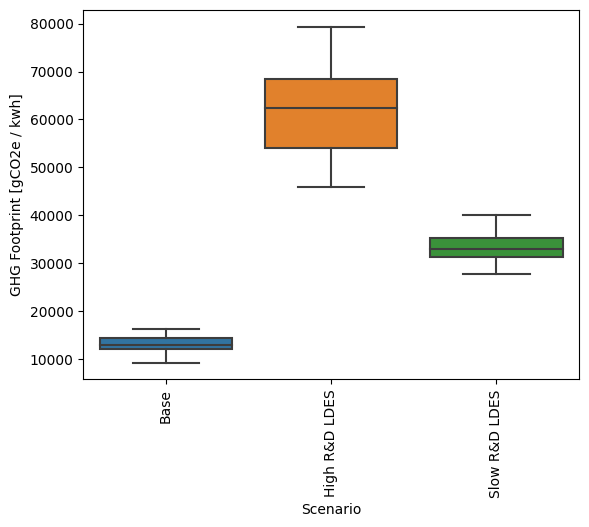

In [19]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ("Metric", "GHG"),
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]])
g.set(ylabel="GHG Footprint [gCO2e / kwh]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot cost metric.

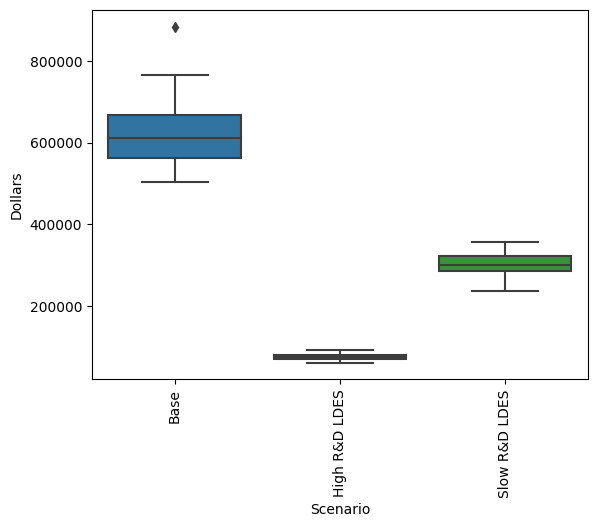

In [20]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ("Metric", "LCOS"),
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]])
g.set(ylabel="Dollars")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot employment metric.

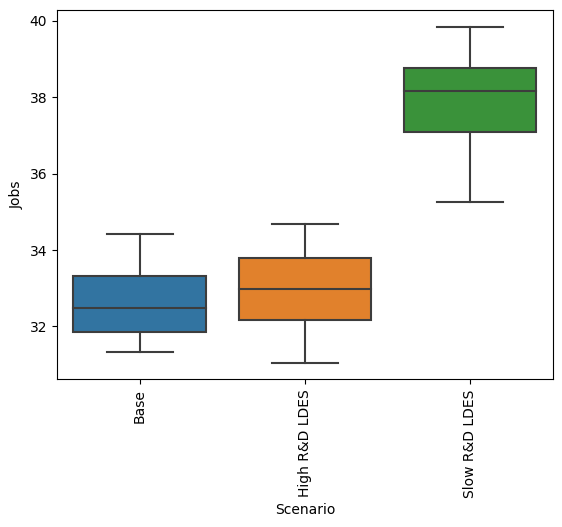

In [21]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ("Metric", "Jobs"),
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]])
g.set(ylabel="Jobs")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Evaluate the investments in the dataset.

In [22]:
investment_results = investments.evaluate_investments(designs, sample_count=50)

Evaluating LDES
Evaluating LDES


### Costs of investments.

In [23]:
investment_results.amounts

,Amount
Investment,
Fast Progress,1000000
No progress,0
Slow Progress,100000


### Benefits of investments.

In [24]:
investment_results.metrics.xs(1, level="Sample", drop_level=False)

Value  \
Investment    Category Tranche       Scenario      Sample Technology Index                  
No progress   R&D LDES R&D LDES Base Base          1      LDES       GHG     11097.213272   
                                                                     Jobs       31.408320   
                                                                     LCOS   662052.712846   
Fast Progress R&D LDES High R&D LDES High R&D LDES 1      LDES       GHG     59489.374097   
                                                                     Jobs       33.192173   
                                                                     LCOS    82587.663320   
Slow Progress R&D LDES Slow R&D LDES Slow R&D LDES 1      LDES       GHG     34438.513982   
                                                                     Jobs       37.044121   
                                                                     LCOS   305293.240448   

                                                                                          Units  
Investment    Category Tranche       Scenario      Sample Technology Index                       
No progress   R&D LDES R&D LDES Base Base          1      LDES       GHG    gCO2e/kilowatt hour  
                                                                     Jobs     job/kilowatt hour  
                                                                     LCOS     USD/kilowatt hour  
Fast Progress R&D LDES High R&D LDES High R&D LDES 1      LDES       GHG    gCO2e/kilowatt hour  
                                                                     Jobs     job/kilowatt hour  
                                                                     LCOS     USD/kilowatt hour  
Slow Progress R&D LDES Slow R&D LDES Slow R&D LDES 1      LDES       GHG    gCO2e/kilowatt hour  
                                                                     Jobs     job/kilowatt hour  
                                                                     LCOS     USD/kilowatt hour

In [25]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

Value                Units
Investment    Technology Sample Index                                    
Fast Progress LDES       1      GHG     59489.374097  gCO2e/kilowatt hour
                                Jobs       33.192173    job/kilowatt hour
                                LCOS    82587.663320    USD/kilowatt hour
No progress   LDES       1      GHG     11097.213272  gCO2e/kilowatt hour
                                Jobs       31.408320    job/kilowatt hour
                                LCOS   662052.712846    USD/kilowatt hour
Slow Progress LDES       1      GHG     34438.513982  gCO2e/kilowatt hour
                                Jobs       37.044121    job/kilowatt hour
                                LCOS   305293.240448    USD/kilowatt hour

### Save results.

In [ ]:
#investment_results.amounts.to_csv("example-investment-amounts.csv")

In [ ]:
#investment_results.metrics.to_csv("example-investment-metrics.csv")

### Plot GHG metric.

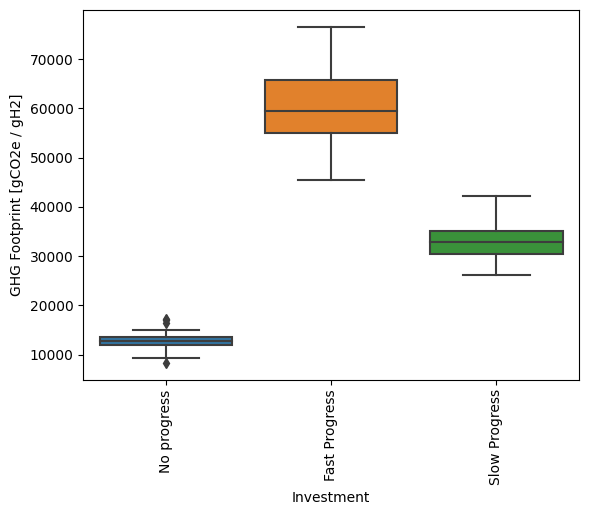

In [26]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "GHG",
        level="Index"
    ).reset_index()[["Investment", "Value"]])
g.set(ylabel="GHG Footprint [gCO2e / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot cost metric.

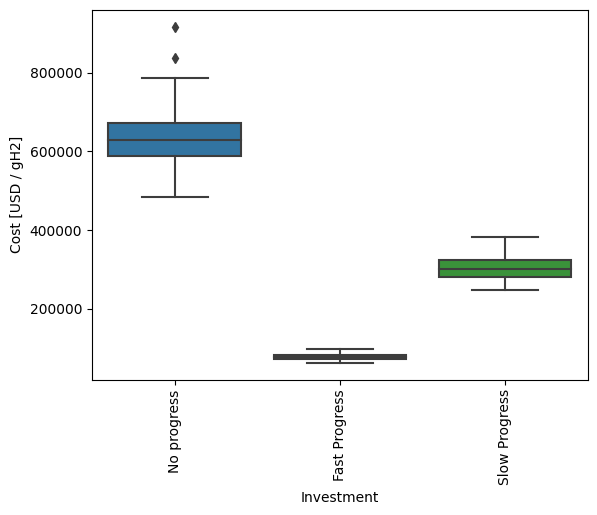

In [28]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "LCOS",
        level="Index"
    ).reset_index()[["Investment", "Value"]]
)
g.set(ylabel="Cost [USD / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot employment metric.

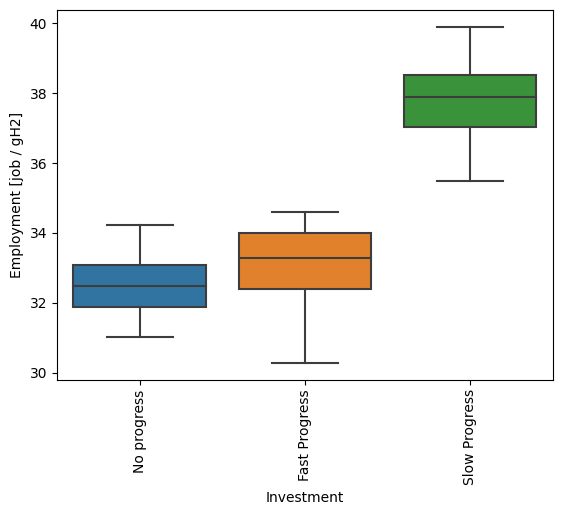

In [29]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Jobs",
        level="Index"
    ).reset_index()[["Investment", "Value"]])
g.set(ylabel="Employment [job / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Sensitity analysis.

### Vary the four efficiencies in the design.

In [ ]:
# Four variables are involved.
variables = [
    ("Input efficiency" , "Water"      ),
    ("Input efficiency" , "Electricity"),
    ("Output efficiency", "Oxygen"     ),
    ("Output efficiency", "Hydrogen"   ),
]

In [ ]:
# Let efficiencies range from 0.75 to 0.975.
efficiencies = np.arange(0.750, 1.000, 0.025)
efficiencies

### Start from the base case.

In [ ]:
base_design = designs.designs.xs("Base Electrolysis", level=1, drop_level=False)
base_design

In [ ]:
base_parameters = designs.parameters.xs("Base Electrolysis", level=1, drop_level=False)
base_parameters

### Generate the new scenarios and append them to the previous ones.

In [ ]:
sensitivities = deepcopy(designs)
sensitivities.designs = sensitivities.designs[0:0]
sensitivities.parameters = sensitivities.parameters[0:0]

In [ ]:
# Iterate over variables and efficiencies.
for variable, index in variables:
    for efficiency in efficiencies:

        # Name the scenario.
        scenario = "Let " + variable + " @ " + index + " = " + str(round(efficiency, 3))
        
        # Alter the base case.
        vary_design = base_design.rename(index={"Base Electrolysis" : scenario}, level=1)
        vary_design.loc[("Simple electrolysis", scenario, variable, index), "Value"] = efficiency
        
        # Keep the parameters the same.
        vary_parameters = base_parameters.rename(index={"Base Electrolysis" : scenario}, level=1)
        
        # Append the results to the existing table of scenarios.
        sensitivities.designs = pd.concat([sensitivities.designs, vary_design])
        sensitivities.parameters = pd.concat([sensitivities.parameters, vary_parameters])

#### Remember to compile the design, since we've added scenarios.

In [ ]:
sensitivities.compile()

#### See how many rows there are in the tables now.

In [ ]:
sensitivities.designs.shape

In [ ]:
sensitivities.parameters.shape

In [ ]:
sensitivities.designs

### Compute the results.

In [ ]:
results = sensitivities.evaluate_scenarios(1)
results

### Plot the cost results.

In [ ]:
cost_results = results.xs("Cost", level="Variable").reset_index()[["Scenario", "Value"]]

In [ ]:
cost_results[0:10]

In [ ]:
cost_results["Variable"  ] = cost_results["Scenario"].apply(lambda x: re.sub(r'^Let (.*) @ (.*) =.*$', '\\1[\\2]', x))
cost_results["Efficiency"] = cost_results["Scenario"].apply(lambda x: float(re.sub(r'^.*= (.*)$', '\\1', x)))
cost_results["Cost [USD/mole]"] = cost_results["Value"]

In [ ]:
cost_results = cost_results[["Variable", "Efficiency", "Cost [USD/mole]"]]
cost_results[0:10]

In [ ]:
# Here is a really simple plot.
cost_results.plot(
    x="Efficiency",
    y="Cost [USD/mole]",
    c=cost_results["Variable"].apply(lambda v: {
        "Input efficiency[Water]"       : "blue"  ,
        "Input efficiency[Electricity]" : "orange",
        "Output efficiency[Oxygen]"     : "green" ,
        "Output efficiency[Hydrogen]"   : "red"   ,
    }[v]),
    kind="scatter"
)